In [2]:
using Plots, FileIO, Images, Plots.PlotMeasures

In [3]:
q=10

10

In [4]:
lambda = exp(2*pi*im/q)

0.8090169943749475 + 0.5877852522924731im

In [5]:
f(z) = lambda * z * (1+z)^2

f (generic function with 1 method)

In [6]:
df(z) = lambda*(1+z)*(1+3*z)

df (generic function with 1 method)

In [7]:
function fdf(z)
    t = 1+z
    s= lambda*t
    return s*z*t, s*(1+3*z);
end
    

fdf (generic function with 1 method)

In [8]:
fp = exp(-pi*im/q)-1

-0.04894348370484647 - 0.3090169943749474im

In [9]:
f(fp)-fp

1.3877787807814457e-17 + 5.551115123125783e-17im

In [10]:
tau(z) = z/(z-fp)

tau (generic function with 1 method)

In [11]:
function Julia(xmin, xmax, ymin, ymax, width, height; maxiter = 100, R = 100)
    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    function iter(z)
        for k=1:maxiter
            z = f(z)
            if (abs2(z)>R)
                return log(k)
                break
            end
        end
        return -1
    end

    mesh = map(iter, zrange);

    return xrange, yrange, mesh
end


Julia (generic function with 1 method)

In [13]:
xrange, yrange, mesh = Julia(-2.25,0.75,-1.5,1.5,800,800, maxiter=1000)

(-2.25:0.0037546933667083854:0.75, -1.5:0.0037546933667083854:1.5, Real[0.0 0.0 … 0.6931471805599453 0.6931471805599453; 0.0 0.0 … 0.6931471805599453 0.6931471805599453; … ; 0.0 0.0 … 0.6931471805599453 0.6931471805599453; 0.0 0.0 … 0.6931471805599453 0.6931471805599453])

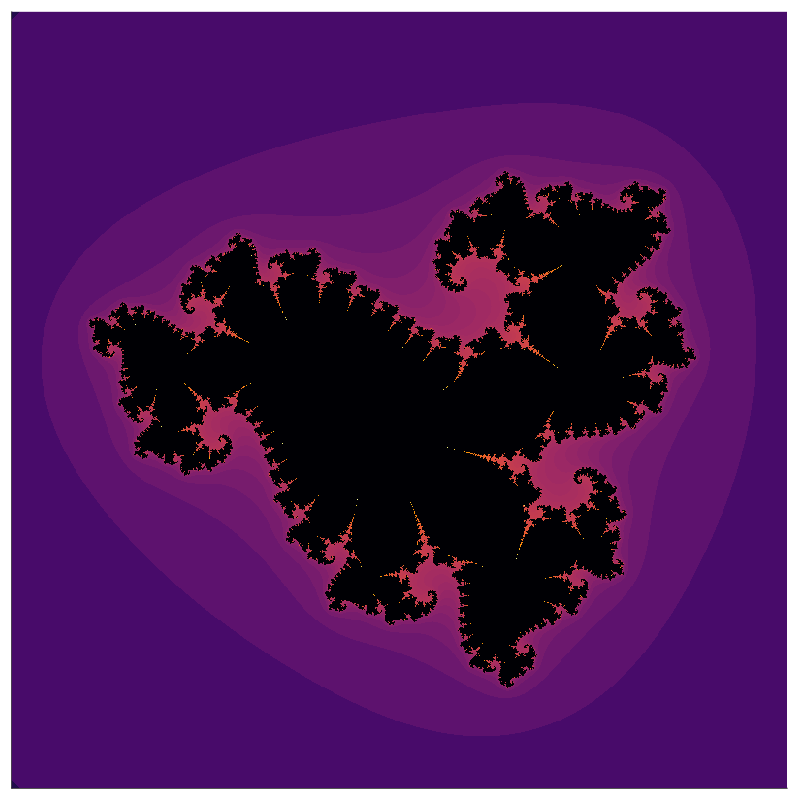

In [14]:
heatmap(xrange, yrange, mesh, size=(800,800), colorbar=false, ticks=false, frame=false)

In [12]:
function Julia_by_Green(xmin, xmax, ymin, ymax, width, height; maxiter1 = 30, maxiter2=500, minmetric = 10000, R = 10000, eps = 0.001, eta=0.4)
    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    deg = 3 # deg(f)

    z=-1/3 # critical point in the parabolic basin
    for k=1:10000
        z = f(z)
    end
    #angle0=angle(z)
    angle0 = angle(tau(z)); # an attracting direction at 0 (in tau-coordinate)

    # compute hyperbolic metric in the escape region
    function iter(z) 
        dz = 1

        # fast escaping case
        for k=1:maxiter1
            z, t = fdf(z)
            dz *= t/deg # dz = (f^k)'(z)/deg^k indeed
            l = abs2(z)
            if (l>R) # escaping case
                g=log(l)/(2*deg^k)
                dg = abs(dz)/abs(z)
                return (dg/sinh(g)>minmetric) ? -100 : -50
                break
            end

            w = tau(z)
            l2 = abs2(w)
            if (l2 < eps) # near the parabolic fixed point
                theta = (angle(w)-angle0)/(2*pi)*q
                if (abs(theta-round(theta))<eta) # in the basin
                    return (round(theta)-k+maxiter2) % q
                    break
                end
            end
        end

        # slow escaping (=not so expanding) case
        dz *= deg^maxiter1; 

        for k=(maxiter1+1):maxiter2
            z, t = fdf(z)
            dz *= t
            l = abs2(z)
            if (l>R) # escaping case
                g = log(l)/2
                dg = abs(dz)/abs(z)
                metric = dg/g; # deg^k sinh(g/deg^k) is close to g when k is large
                return (metric>minmetric) ? -100 : -50
                break
            end
            
            w = tau(z)
            l2 = abs2(w)
            if (l2 < eps) # near the parabolic fixed point
                theta = (angle(w)-angle0)/(2*pi)*q
                if (abs(theta-round(theta))<eta) # in the basin
                    return (round(theta)-k+maxiter2) % q
                    break
                end
            end
        end

        return -150
    end

    mesh = map(iter, zrange);

    return xrange, yrange, mesh
end

Julia_by_Green (generic function with 1 method)

In [16]:
xrange, yrange, mesh = Julia_by_Green(-2.25,0.75,-1.5,1.5,800,800, minmetric=200, maxiter1=30, maxiter2=10000, eps=0.1, eta=0.2)

(-2.25:0.0037546933667083854:0.75, -1.5:0.0037546933667083854:1.5, Real[-50 -50 … -50 -50; -50 -50 … -50 -50; … ; -50 -50 … -50 -50; -50 -50 … -50 -50])

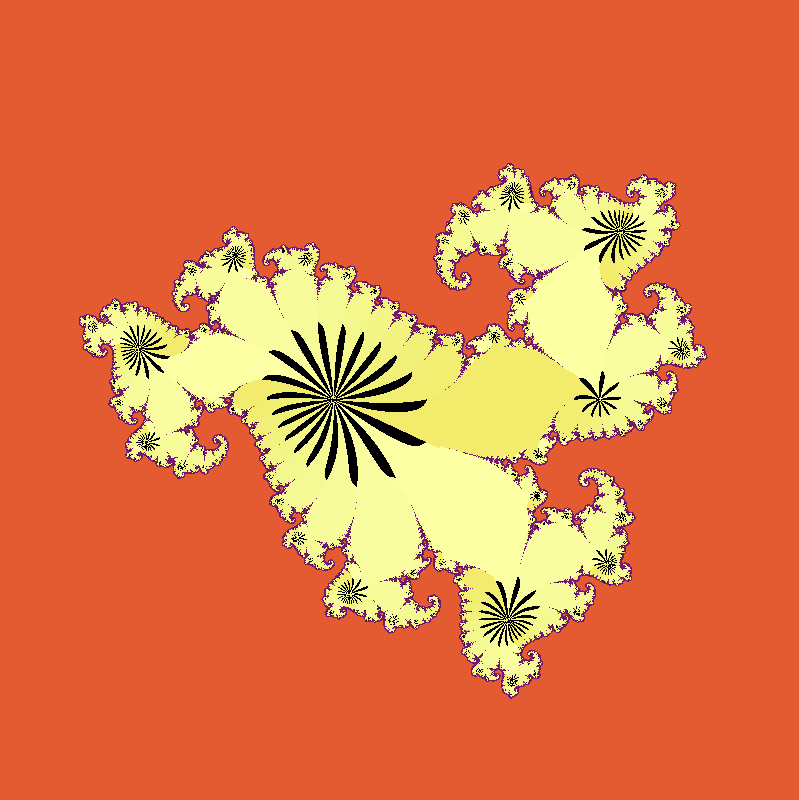

In [17]:
fig = heatmap(xrange, yrange, mesh, size=(800,800), colorbar=false, ticks=false, frame=false, margins=-2mm, dpi=100)

In [18]:
savefig("out.png")

"/Users/inou/Documents/jupyter/JuliaJulia/out.png"

In [407]:
xrange, yrange, mesh = Julia_by_Green(-0.2,0.2,-0.2,0.2,200,200, minmetric=100, maxiter1=30, maxiter2=3000,eps=0.1, eta=0.2)

(-0.2:0.0020100502512562816:0.2, -0.2:0.0020100502512562816:0.2, Real[-100 -100 … -50 -50; -100 -100 … -50 -50; … ; 9.0 9.0 … 8.0 8.0; 9.0 9.0 … 8.0 8.0])

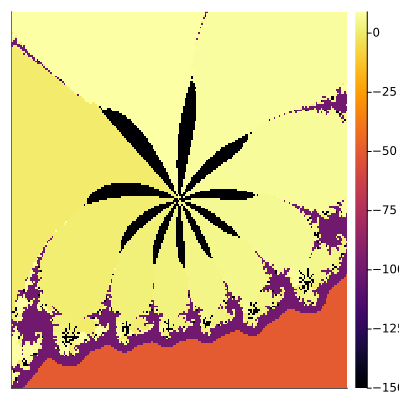

In [408]:
heatmap(xrange, yrange, mesh, size=(400,400), ticks=false, frame=false)

In [13]:
xrange2, yrange2, mesh2 = Julia_by_Green(-2.25,0.75,-1.5,1.5,800,800, minmetric=200, maxiter1=30, maxiter2=100000, eps=0.1, eta=0.2)

(-2.25:0.0037546933667083854:0.75, -1.5:0.0037546933667083854:1.5, Real[-50 -50 … -50 -50; -50 -50 … -50 -50; … ; -50 -50 … -50 -50; -50 -50 … -50 -50])

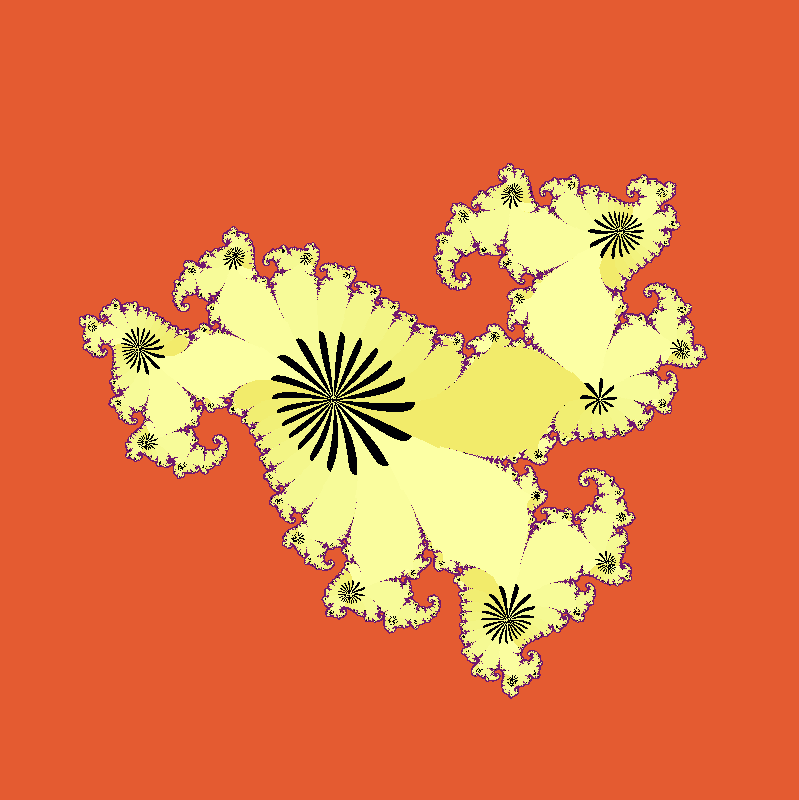

In [14]:
heatmap(xrange2, yrange2, mesh2, size=(800,800), colorbar=false, ticks=false, frame=false, margins=-2mm, dpi=100)

In [15]:
savefig("out2.png")

"/Users/inou/Documents/jupyter/JuliaJulia/out2.png"